# Dilation in postprocess

Here we develop and evaluate the method of dilating the resulting labels so they have similar size to ground truth.

In [1]:
from notebook_utils import *

import imageio
import skimage.segmentation
import skimage.filters

import scipy.stats

import random

import os
import shutil

%matplotlib inline

# Load input data

In [2]:
# general
dir_root = r'D:\Fafa\MIT\CellDx\watersheds\improve_dilation'


In [3]:
input_imaris_1 = imageio.imread(os.path.join(dir_root, '21.tif'))
gt_imaris_2 = imageio.imread(os.path.join(dir_root, '21_gt.tif'))
labels_imaris_4 = imageio.imread(os.path.join(dir_root, '21_imaris.tif'))

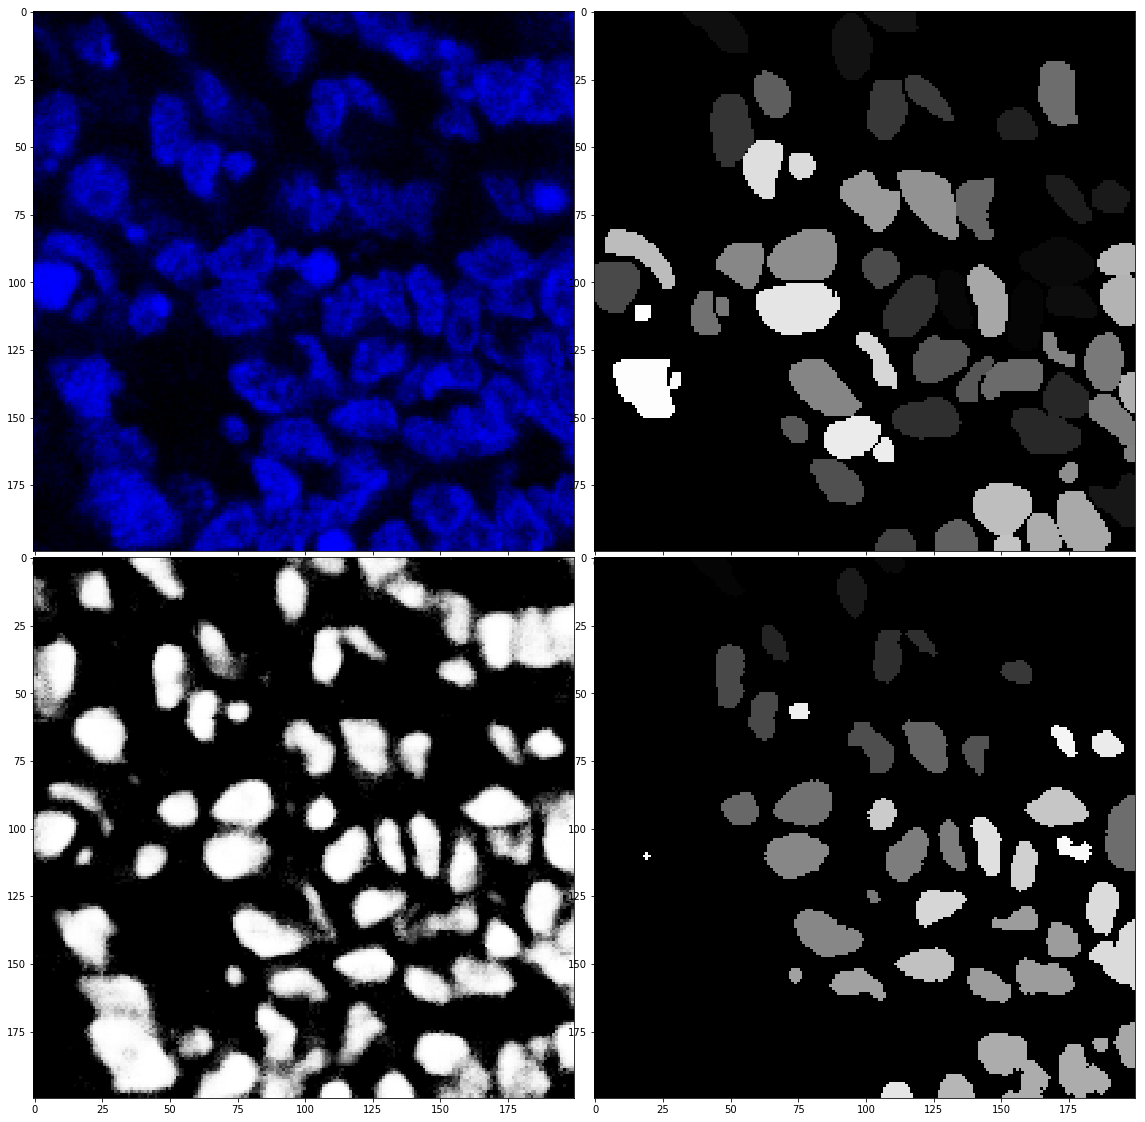

In [4]:
input_1 = imageio.imread(os.path.join(dir_root, '14.tif'))
gt_2 = imageio.imread(os.path.join(dir_root, '14_gt.tif'))[::,::,2]
probs_3 = imageio.imread(os.path.join(dir_root, '14_probs.tif'))[::,::,0]
labels_4 = imageio.imread(os.path.join(dir_root, '14_labels.tif'))[::,::,0]

show_all(2,2,input_1, gt_2, probs_3, labels_4, scale=20)

In [5]:
def mask_diff(a, b):
    return ((a > 0) * (b == 0)) * 255

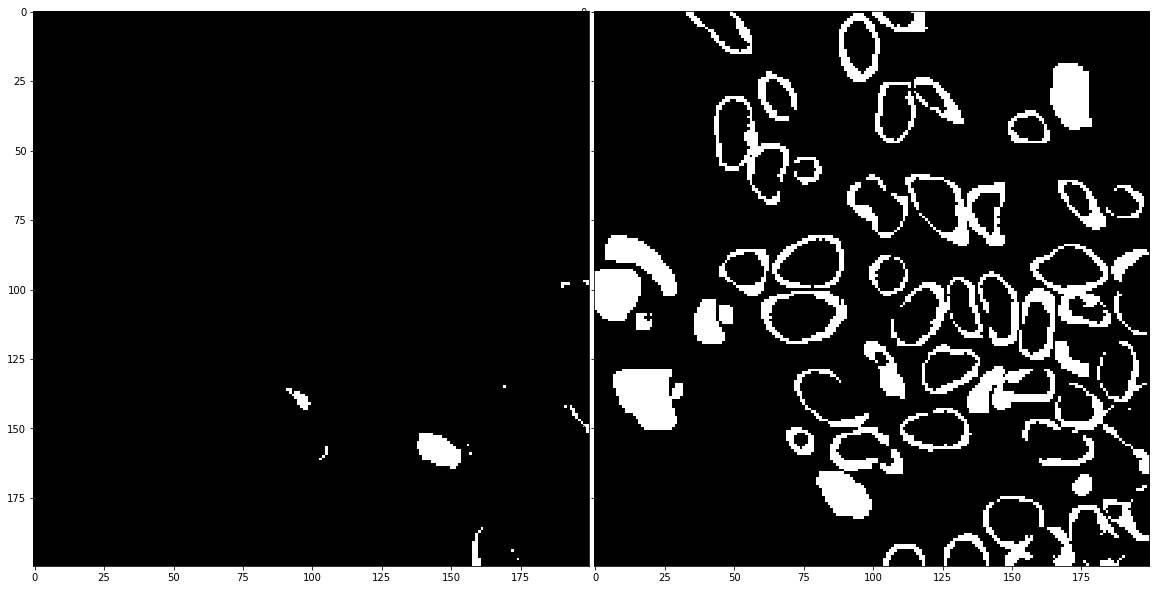

In [6]:
show_all(1,2,mask_diff(labels_4, gt_2), mask_diff(gt_2, labels_4), scale=20, cmap='gray')

# Use standard dilation

In [7]:
import scipy.ndimage
struct = scipy.ndimage.morphology.generate_binary_structure(2, 1) * 1
struct_open = scipy.ndimage.morphology.iterate_structure(struct, 2) * 1

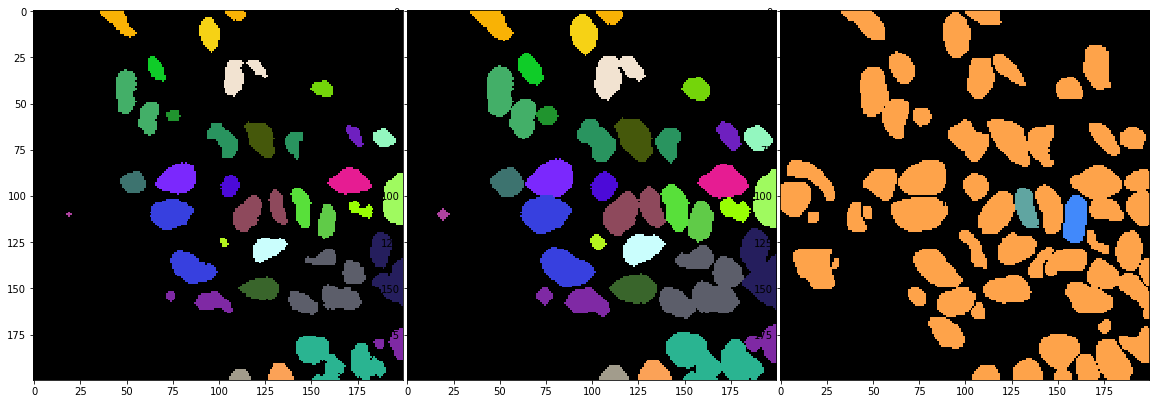

In [8]:
foot = scipy.ndimage.morphology.iterate_structure(struct, 2)
labels_dilated = scipy.ndimage.morphology.grey_dilation(labels_4, footprint=foot)
show_all(1,3,labels_4, labels_dilated, gt_2, scale=20, cmap='rand')

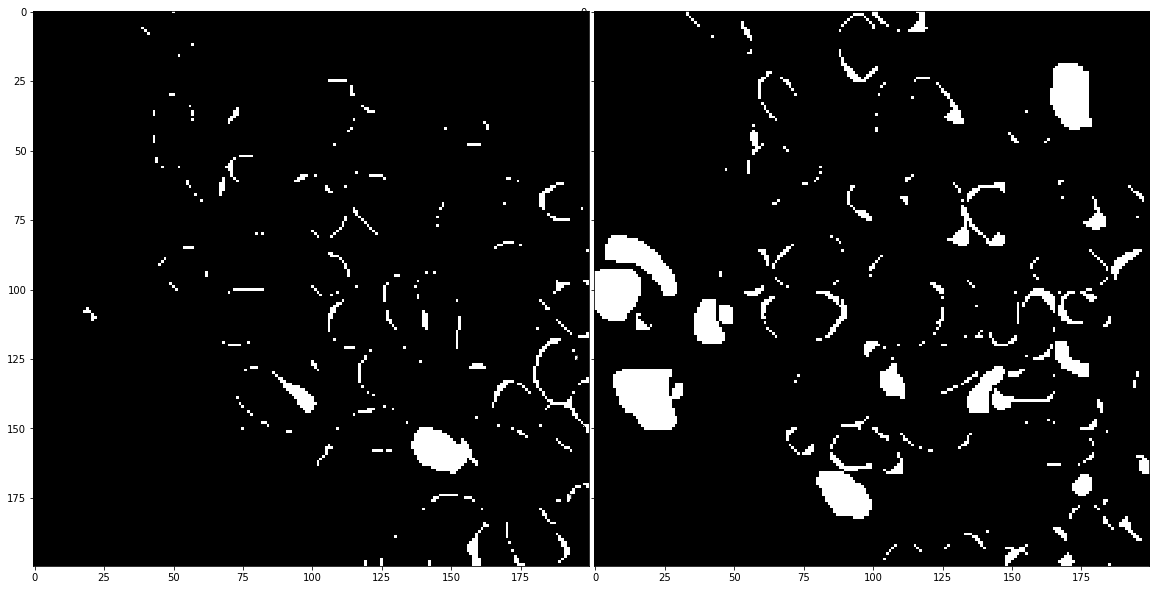

In [9]:
show_all(1,2,mask_diff(labels_dilated, gt_2), mask_diff(gt_2, labels_dilated), scale=20, cmap='gray')

In [10]:
np.unique(labels_4)

Image([ 0,  1,  2,  5,  7,  9, 11, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26,
       30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49], dtype=uint8)

In [11]:
np.unique(labels_dilated)

array([ 0,  1,  2,  5,  7,  9, 11, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26,
       30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49], dtype=uint8)

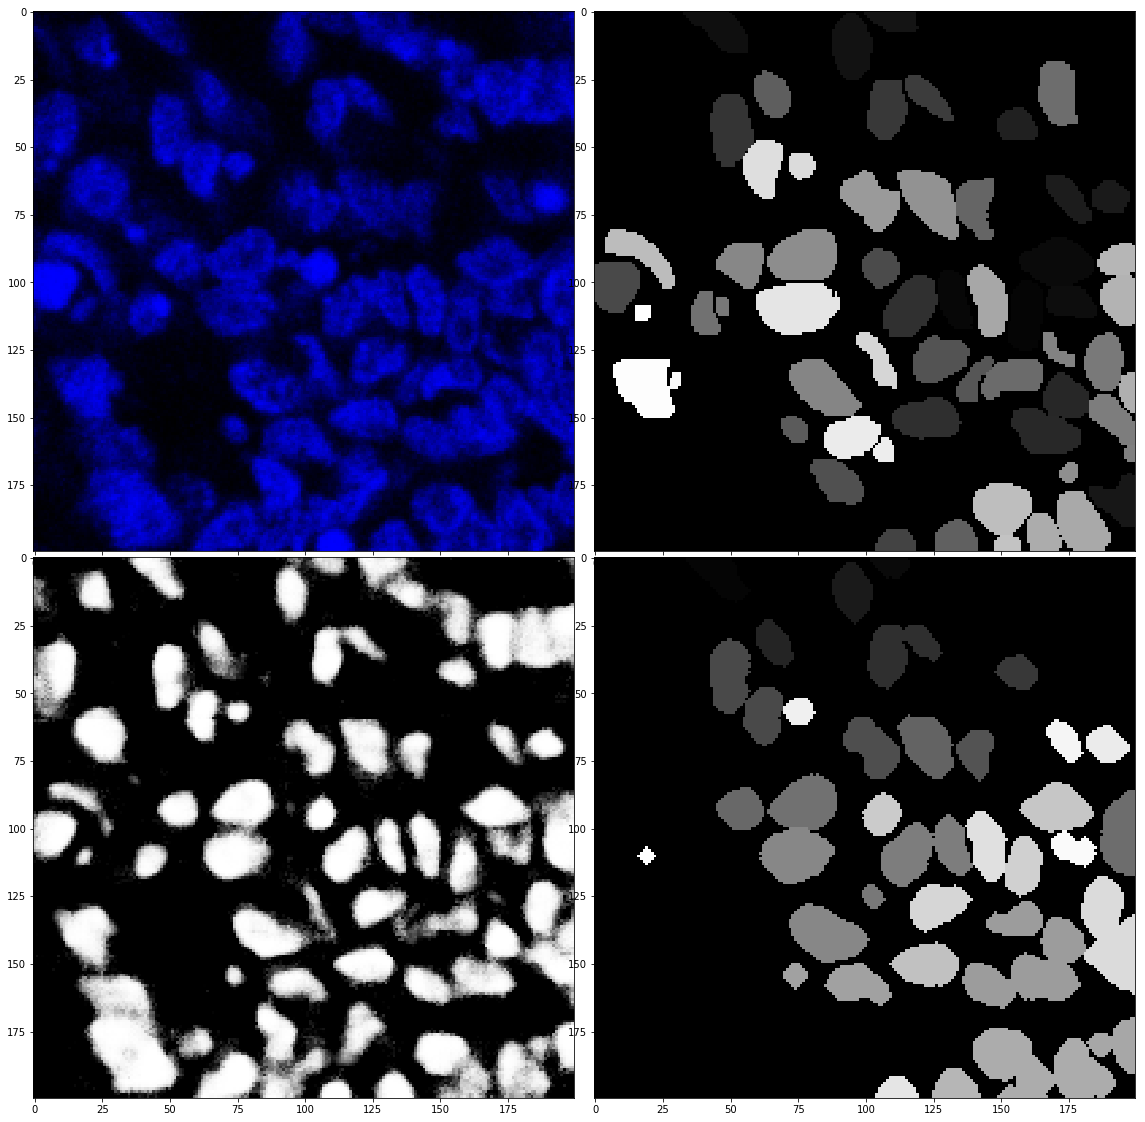

In [12]:
show_all(2,2,input_1, gt_2, probs_3, labels_dilated, scale=20)

# Test CLB implementation on IMARIS

In [13]:
import clb.identify_cells

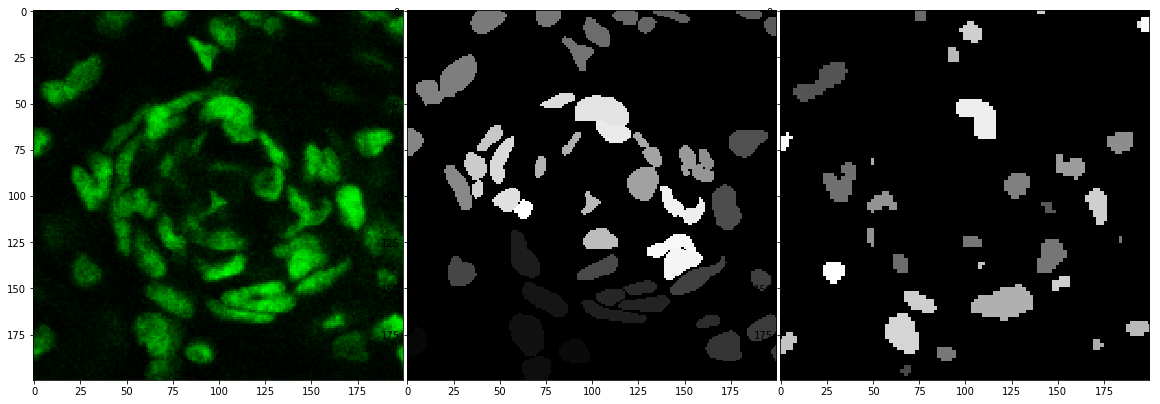

In [14]:
show_all(1,3,input_imaris_1, gt_imaris_2, labels_imaris_4, scale=20)

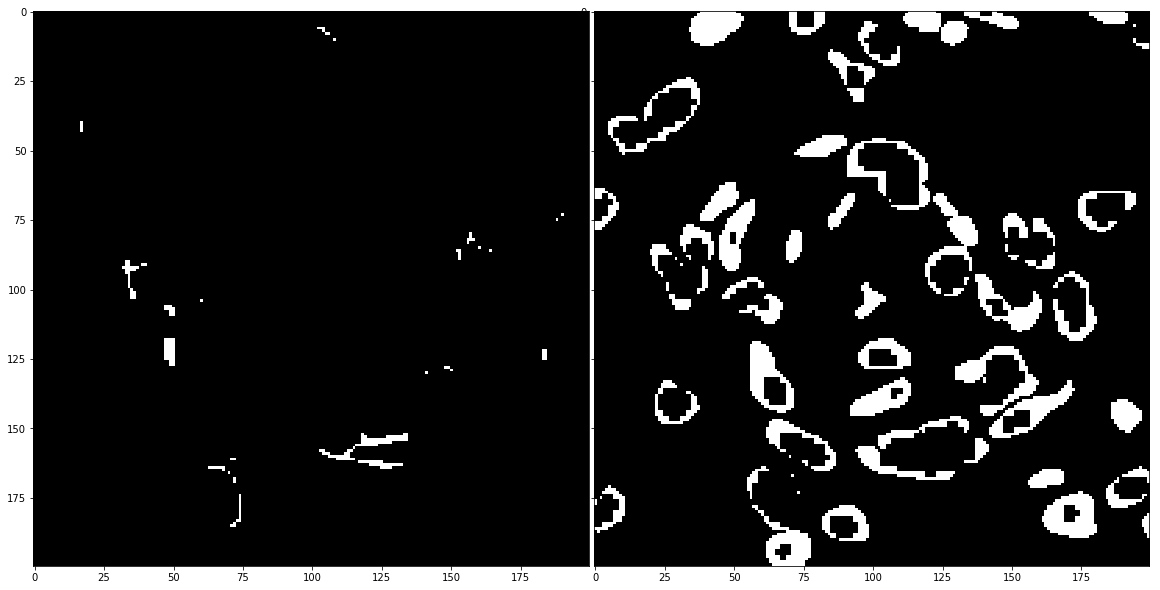

In [15]:
show_all(1,2,mask_diff(labels_imaris_4, gt_imaris_2), mask_diff(gt_imaris_2, labels_imaris_4), scale=20, cmap='gray')

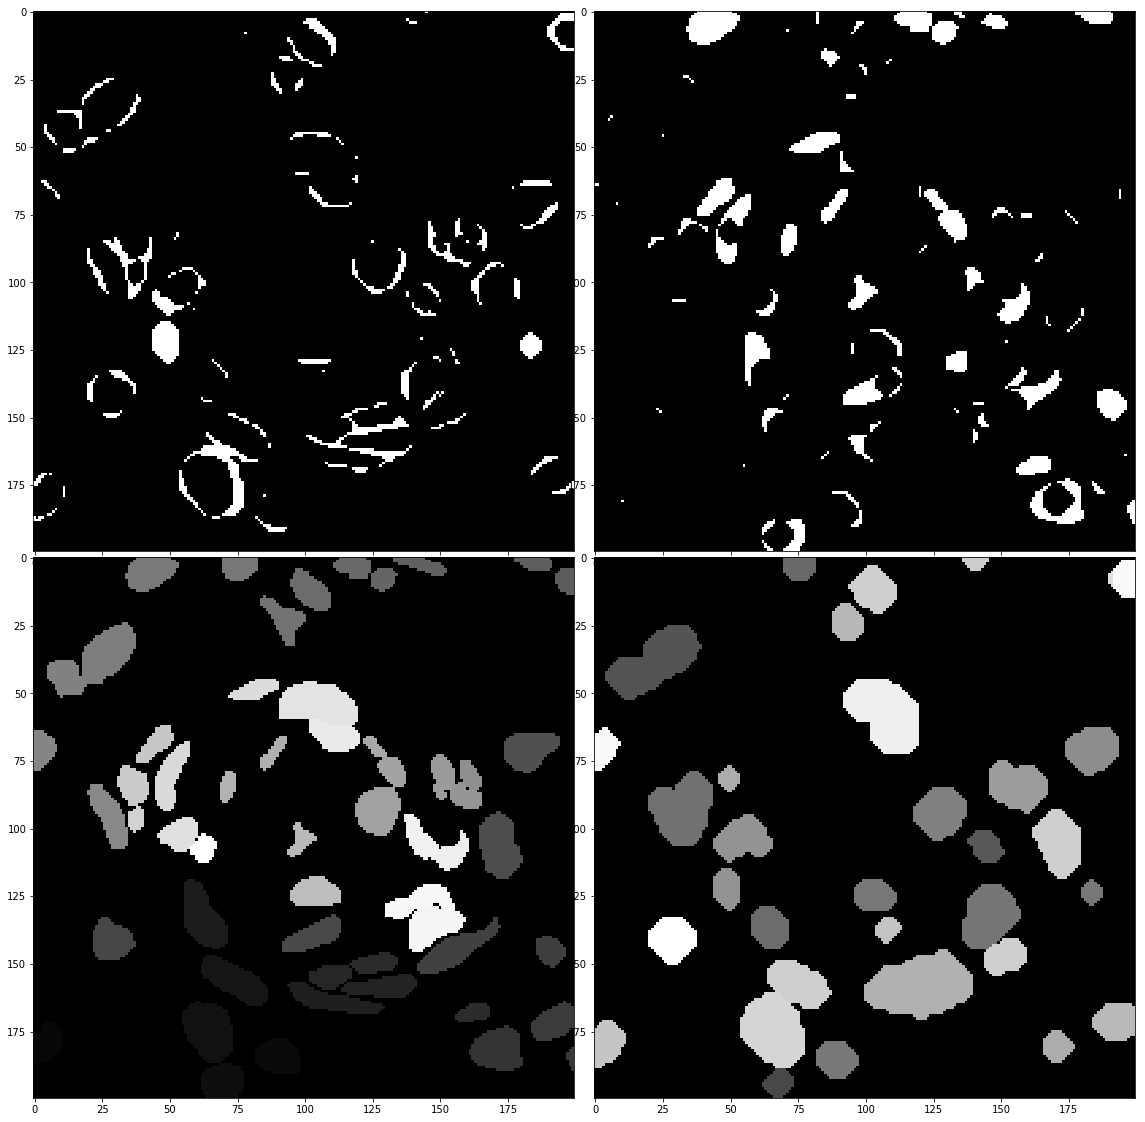

In [31]:
labels_imaris_4_volume = np.expand_dims(labels_imaris_4, 0)
labels_imaris_dilated = clb.identify_cells.dilation_only_2d(labels_imaris_4_volume, 3)[0]
show_all(2,2,mask_diff(labels_imaris_dilated, gt_imaris_2), mask_diff(gt_imaris_2, labels_imaris_dilated),
         gt_imaris_2, labels_imaris_dilated, scale=20, cmap='gray')